In [1]:
import pandas as pd
import numpy as np
import time

df = pd.read_csv('../data/FertilizersProduct.csv')
df.head()

#Purpose: to get a dataframe that will create a proportional stacked bar chart by fertilizer type

#Use vectorization/Cython/list comp. to get format of dataframe
#Use apply/iterrtuples/iterrows for final format

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,4007,"Ammonia, anhydrous",5610,Import Quantity,2011,2011,tonnes,4.49,R
1,2,Afghanistan,4007,"Ammonia, anhydrous",5610,Import Quantity,2014,2014,tonnes,2.00,R
2,2,Afghanistan,4007,"Ammonia, anhydrous",5610,Import Quantity,2017,2017,tonnes,2.07,R
3,2,Afghanistan,4007,"Ammonia, anhydrous",5622,Import Value,2011,2011,1000 US$,2.69,R
4,2,Afghanistan,4007,"Ammonia, anhydrous",5622,Import Value,2014,2014,1000 US$,1.07,R


In [32]:
#Vectorization - uses built in math ops or converting between wide/long or use groupby/filter/transform...
#Does not work well with incomplete datasets (with nan)



#Convert long to wide using pivot/stack or wide to long using melt/unstack

#Pivot uses index (new index), columns (new columns), values (new values)
#Stack uses level (levels in int/str/list), fillna (drop nan of result)
#Pivot_table is like pivot but with a built in aggfunc

#Melt uses id_vars (identifier column), value_vars (melting column), value_name (name of new melting column), col_name (if already has different levels)

dfpivot = df.copy(deep=False)

start = time.time()

dfpivot = dfpivot[dfpivot['Unit']=='tonnes'].drop(columns=['Unit'])
dfpivot = dfpivot.groupby(['Area','Item'], as_index=False)['Value'].sum()
dfpivot = dfpivot.pivot(index='Area', columns='Item', values='Value')

dfpivot = dfpivot.fillna(0)

print("Vectorization took: ",time.time()-start," seconds")

dfpivot.head()

Vectorization took:  0.054477691650390625  seconds


Item,"Ammonia, anhydrous",Ammonium nitrate (AN),Ammonium sulphate,Calcium ammonium nitrate (CAN) and other mixtures with calcium carbonate,Diammonium phosphate (DAP),Fertilizers n.e.c.,Monoammonium phosphate (MAP),NPK fertilizers,Other NK compounds,Other NP compounds,...,PK compounds,Phosphate rock,Potassium chloride (muriate of potash) (MOP),Potassium nitrate,Potassium sulphate (sulphate of potash) (SOP),Sodium nitrate,Superphosphates above 35%,"Superphosphates, other",Urea,Urea and ammonium nitrate solutions (UAN)
Area,,,,,,,,,,,,,,,,,,,,,
Afghanistan,8.56,3244.57,28.34,20.03,67393.32,42464.99,3444.53,105892.68,0.0,163301.41,...,0.26,14176.45,543.43,0.07,23.90,17.85,13448.58,0.00,1616890.03,5.25
Albania,1120.54,1001720.59,1953.95,16113.21,532561.01,18351.73,1245.36,130420.00,0.0,31440.98,...,4094.71,6281.35,2740.46,418.36,3681.60,6431.68,569761.33,38753.00,967101.33,104.80
Algeria,9993103.16,2117203.14,199644.67,167570.44,58572.51,92574.98,257234.52,2933324.71,0.0,146740.93,...,57253.36,26503675.84,106605.88,71239.21,692694.37,3745.73,869833.80,131825.00,11192522.82,3587527.80
Angola,493.25,133245.73,270978.84,944.01,3925.10,81258.44,1915.74,599950.71,0.0,10150.54,...,58616.51,1446.86,97073.91,1843.15,3097.75,633.98,6881.57,650.44,148596.06,2173.38
Antigua and Barbuda,44.96,369.22,25.51,0.05,82.76,1856.54,0.02,4000.68,0.0,103.18,...,329.88,5.03,0.43,1.20,25.32,0.00,0.01,1.00,42.74,0.01


In [15]:
#Import pyx file and call its methods using pyxfile.()
#Create/modify setup.py and build in terminal using "python setup.py build_ext --inplace"
import fertilizerprocessor

#Cython - uses C framework (efficient) to implement Python code

dfcython = pd.DataFrame(index=np.unique(df['Area']),columns=np.unique(df['Item']))


start = time.time()

dataframedict = fertilizerprocessor.fertilizerCount(df['Area'], df['Item'], df['Unit'], df['Value'])


for k,v in dataframedict.items():
    items = k.split('_')
    dfcython.at[items[0],items[1]] = v

dfcython = dfcython.fillna(0)

print('Cython took: ',time.time()-start,' seconds')

dfcython.head()


Cython took:  0.11293387413024902  seconds


,"Ammonia, anhydrous",Ammonium nitrate (AN),Ammonium sulphate,Calcium ammonium nitrate (CAN) and other mixtures with calcium carbonate,Diammonium phosphate (DAP),Fertilizers n.e.c.,Monoammonium phosphate (MAP),NPK fertilizers,Other NK compounds,Other NP compounds,...,PK compounds,Phosphate rock,Potassium chloride (muriate of potash) (MOP),Potassium nitrate,Potassium sulphate (sulphate of potash) (SOP),Sodium nitrate,Superphosphates above 35%,"Superphosphates, other",Urea,Urea and ammonium nitrate solutions (UAN)
Afghanistan,8.56,3244.57,28.34,20.03,67393.32,42464.99,3444.53,105892.68,0.0,163301.41,...,0.26,14176.45,543.43,0.07,23.90,17.85,13448.58,0.00,1616890.03,5.25
Albania,1120.54,1001720.59,1953.95,16113.21,532561.01,18351.73,1245.36,130420.00,0.0,31440.98,...,4094.71,6281.35,2740.46,418.36,3681.60,6431.68,569761.33,38753.00,967101.33,104.80
Algeria,9993103.16,2117203.14,199644.67,167570.44,58572.51,92574.98,257234.52,2933324.71,0.0,146740.93,...,57253.36,26503675.84,106605.88,71239.21,692694.37,3745.73,869833.80,131825.00,11192522.82,3587527.80
Angola,493.25,133245.73,270978.84,944.01,3925.10,81258.44,1915.74,599950.71,0.0,10150.54,...,58616.51,1446.86,97073.91,1843.15,3097.75,633.98,6881.57,650.44,148596.06,2173.38
Antigua and Barbuda,44.96,369.22,25.51,0.05,82.76,1856.54,0.02,4000.68,0.0,103.18,...,329.88,5.03,0.43,1.20,25.32,0.00,0.01,1.00,42.74,0.01


In [10]:
#List comprehension - create/manipulate lists in a single line modified for loop

#list = [expression(i) for i in list_object if filter(i)]

dflist = pd.DataFrame(index=np.unique(df['Area']),columns=np.unique(df['Item']))

start = time.time()


total = dict()
combined = [list(row) for row in zip(df['Area'],df['Item'],df['Unit'],df['Value']) if row[2]=='tonnes']

for item in combined:
    item = '_'.join(item[0:3])
    total[item] = 0

for item in combined:
    key = '_'.join(item[0:3])
    if isinstance(item[3], float):
        total[key] += item[3]

for k,v in total.items():
    items = k.split('_')
    dflist.at[items[0],items[1]] = v

dflist = dflist.fillna(0)

print('List comprehension took ',time.time()-start,' seconds')

dflist.head()

List comprehension took  0.4543440341949463  seconds


,"Ammonia, anhydrous",Ammonium nitrate (AN),Ammonium sulphate,Calcium ammonium nitrate (CAN) and other mixtures with calcium carbonate,Diammonium phosphate (DAP),Fertilizers n.e.c.,Monoammonium phosphate (MAP),NPK fertilizers,Other NK compounds,Other NP compounds,...,PK compounds,Phosphate rock,Potassium chloride (muriate of potash) (MOP),Potassium nitrate,Potassium sulphate (sulphate of potash) (SOP),Sodium nitrate,Superphosphates above 35%,"Superphosphates, other",Urea,Urea and ammonium nitrate solutions (UAN)
Afghanistan,8.56,3244.57,28.34,20.03,67393.32,42464.99,3444.53,105892.68,0.0,163301.41,...,0.26,14176.45,543.43,0.07,23.90,17.85,13448.58,0.00,1616890.03,5.25
Albania,1120.54,1001720.59,1953.95,16113.21,532561.01,18351.73,1245.36,130420.00,0.0,31440.98,...,4094.71,6281.35,2740.46,418.36,3681.60,6431.68,569761.33,38753.00,967101.33,104.80
Algeria,9993103.16,2117203.14,199644.67,167570.44,58572.51,92574.98,257234.52,2933324.71,0.0,146740.93,...,57253.36,26503675.84,106605.88,71239.21,692694.37,3745.73,869833.80,131825.00,11192522.82,3587527.80
Angola,493.25,133245.73,270978.84,944.01,3925.10,81258.44,1915.74,599950.71,0.0,10150.54,...,58616.51,1446.86,97073.91,1843.15,3097.75,633.98,6881.57,650.44,148596.06,2173.38
Antigua and Barbuda,44.96,369.22,25.51,0.05,82.76,1856.54,0.02,4000.68,0.0,103.18,...,329.88,5.03,0.43,1.20,25.32,0.00,0.01,1.00,42.74,0.01


In [88]:
#Apply - works on column/row
#Applymap - works elementwise across many rows/columns
#Map - works elementwise by series only

In [34]:
#Apply

dfapply = df.copy(deep=False)

# dfapply.sort_values(by=['Ammonia, anhydrous'],inplace=True, ascending=False)
# dfapply = dfapply.head(20)

start = time.time()


dfapply = dfapply[['Area','Item','Unit','Value']]
dfapply = dfapply[dfapply['Unit'].apply(lambda x: x=='tonnes')]
dfapply.drop(columns=['Unit'], inplace=True)
dfapply = dfapply.groupby(['Area','Item'], as_index=False)['Value'].sum()
dfapply = dfapply.pivot(index='Area', columns='Item', values='Value')
dfapply = dfapply.fillna(0)

print('Apply took ', time.time()-start,' seconds')

dfapply.head()

Apply took  0.07850837707519531  seconds


Item,"Ammonia, anhydrous",Ammonium nitrate (AN),Ammonium sulphate,Calcium ammonium nitrate (CAN) and other mixtures with calcium carbonate,Diammonium phosphate (DAP),Fertilizers n.e.c.,Monoammonium phosphate (MAP),NPK fertilizers,Other NK compounds,Other NP compounds,...,PK compounds,Phosphate rock,Potassium chloride (muriate of potash) (MOP),Potassium nitrate,Potassium sulphate (sulphate of potash) (SOP),Sodium nitrate,Superphosphates above 35%,"Superphosphates, other",Urea,Urea and ammonium nitrate solutions (UAN)
Area,,,,,,,,,,,,,,,,,,,,,
Afghanistan,8.56,3244.57,28.34,20.03,67393.32,42464.99,3444.53,105892.68,0.0,163301.41,...,0.26,14176.45,543.43,0.07,23.90,17.85,13448.58,0.00,1616890.03,5.25
Albania,1120.54,1001720.59,1953.95,16113.21,532561.01,18351.73,1245.36,130420.00,0.0,31440.98,...,4094.71,6281.35,2740.46,418.36,3681.60,6431.68,569761.33,38753.00,967101.33,104.80
Algeria,9993103.16,2117203.14,199644.67,167570.44,58572.51,92574.98,257234.52,2933324.71,0.0,146740.93,...,57253.36,26503675.84,106605.88,71239.21,692694.37,3745.73,869833.80,131825.00,11192522.82,3587527.80
Angola,493.25,133245.73,270978.84,944.01,3925.10,81258.44,1915.74,599950.71,0.0,10150.54,...,58616.51,1446.86,97073.91,1843.15,3097.75,633.98,6881.57,650.44,148596.06,2173.38
Antigua and Barbuda,44.96,369.22,25.51,0.05,82.76,1856.54,0.02,4000.68,0.0,103.18,...,329.88,5.03,0.43,1.20,25.32,0.00,0.01,1.00,42.74,0.01


In [90]:
#Itertuples

dftuples = dfpivot.copy(deep=False)

dftuples.sort_values(by=['Ammonia, anhydrous'],inplace=True, ascending=False)
dftuples = dftuples.head(20)

start = time.time()

dftuples1 = pd.DataFrame(columns=dftuples.columns.to_list())

sums = np.array([col for col in dftuples[dftuples.columns].sum()])

for row in dftuples.itertuples():
    dftuples1.loc[row[0]] = np.array(row[1:])/sums*100

print('Itertuples took ',time.time()-start,' seconds')

dftuples1.head()

Itertuples took  0.08946084976196289  seconds


,"Ammonia, anhydrous",Ammonium nitrate (AN),Ammonium sulphate,Calcium ammonium nitrate (CAN) and other mixtures with calcium carbonate,Diammonium phosphate (DAP),Fertilizers n.e.c.,Monoammonium phosphate (MAP),NPK fertilizers,Other NK compounds,Other NP compounds,...,PK compounds,Phosphate rock,Potassium chloride (muriate of potash) (MOP),Potassium nitrate,Potassium sulphate (sulphate of potash) (SOP),Sodium nitrate,Superphosphates above 35%,"Superphosphates, other",Urea,Urea and ammonium nitrate solutions (UAN)
Brazil,6.052076,6.539510,6.421405,5.149885,6.671554,5.640244,6.808511,5.129870,17.741935,6.576126,...,5.465288,7.026144,6.434316,5.656109,6.097561,6.362855,7.661290,13.565891,6.064435,4.814815
United Arab Emirates,5.559465,5.381471,4.013378,3.689470,4.398827,4.878049,4.539007,6.103896,0.000000,4.574696,...,4.579025,5.065359,5.294906,4.826546,4.591105,4.643164,6.370968,0.775194,5.938092,3.888889
United States of America,5.277973,5.722071,5.618729,4.919293,6.158358,4.878049,5.957447,4.805195,9.677419,5.289492,...,5.465288,5.637255,5.630027,4.826546,6.025825,5.503009,5.967742,5.426357,5.306380,7.777778
Canada,5.277973,5.108992,5.819398,5.918524,5.571848,5.411585,5.035461,4.285714,0.000000,4.717655,...,4.874446,5.555556,5.764075,4.977376,4.734577,5.331040,5.161290,1.550388,5.495894,8.055556
Mexico,5.277973,4.972752,6.421405,3.920061,5.278592,4.878049,5.106383,4.675325,0.000000,5.075054,...,4.874446,5.228758,4.758713,5.128205,5.093257,5.503009,5.403226,9.302326,4.548326,5.277778


In [91]:
#Iterrows

dfrows = dfpivot.copy(deep=False)

dfrows.sort_values(by=['Ammonia, anhydrous'],inplace=True, ascending=False)
dfrows = dfrows.head(20)

start = time.time()

dfrows1 = pd.DataFrame(columns=dfrows.columns.to_list())

sums = np.array([col for col in dfrows[dfrows.columns].sum()])

for index,row in dfrows.iterrows():
    dfrows1.loc[index] = np.array([x for x in row])/sums*100

print('Iterrows took ',time.time()-start,' seconds')

dfrows1.head()


Iterrows took  0.07892036437988281  seconds


,"Ammonia, anhydrous",Ammonium nitrate (AN),Ammonium sulphate,Calcium ammonium nitrate (CAN) and other mixtures with calcium carbonate,Diammonium phosphate (DAP),Fertilizers n.e.c.,Monoammonium phosphate (MAP),NPK fertilizers,Other NK compounds,Other NP compounds,...,PK compounds,Phosphate rock,Potassium chloride (muriate of potash) (MOP),Potassium nitrate,Potassium sulphate (sulphate of potash) (SOP),Sodium nitrate,Superphosphates above 35%,"Superphosphates, other",Urea,Urea and ammonium nitrate solutions (UAN)
Brazil,6.052076,6.539510,6.421405,5.149885,6.671554,5.640244,6.808511,5.129870,17.741935,6.576126,...,5.465288,7.026144,6.434316,5.656109,6.097561,6.362855,7.661290,13.565891,6.064435,4.814815
United Arab Emirates,5.559465,5.381471,4.013378,3.689470,4.398827,4.878049,4.539007,6.103896,0.000000,4.574696,...,4.579025,5.065359,5.294906,4.826546,4.591105,4.643164,6.370968,0.775194,5.938092,3.888889
United States of America,5.277973,5.722071,5.618729,4.919293,6.158358,4.878049,5.957447,4.805195,9.677419,5.289492,...,5.465288,5.637255,5.630027,4.826546,6.025825,5.503009,5.967742,5.426357,5.306380,7.777778
Canada,5.277973,5.108992,5.819398,5.918524,5.571848,5.411585,5.035461,4.285714,0.000000,4.717655,...,4.874446,5.555556,5.764075,4.977376,4.734577,5.331040,5.161290,1.550388,5.495894,8.055556
Mexico,5.277973,4.972752,6.421405,3.920061,5.278592,4.878049,5.106383,4.675325,0.000000,5.075054,...,4.874446,5.228758,4.758713,5.128205,5.093257,5.503009,5.403226,9.302326,4.548326,5.277778


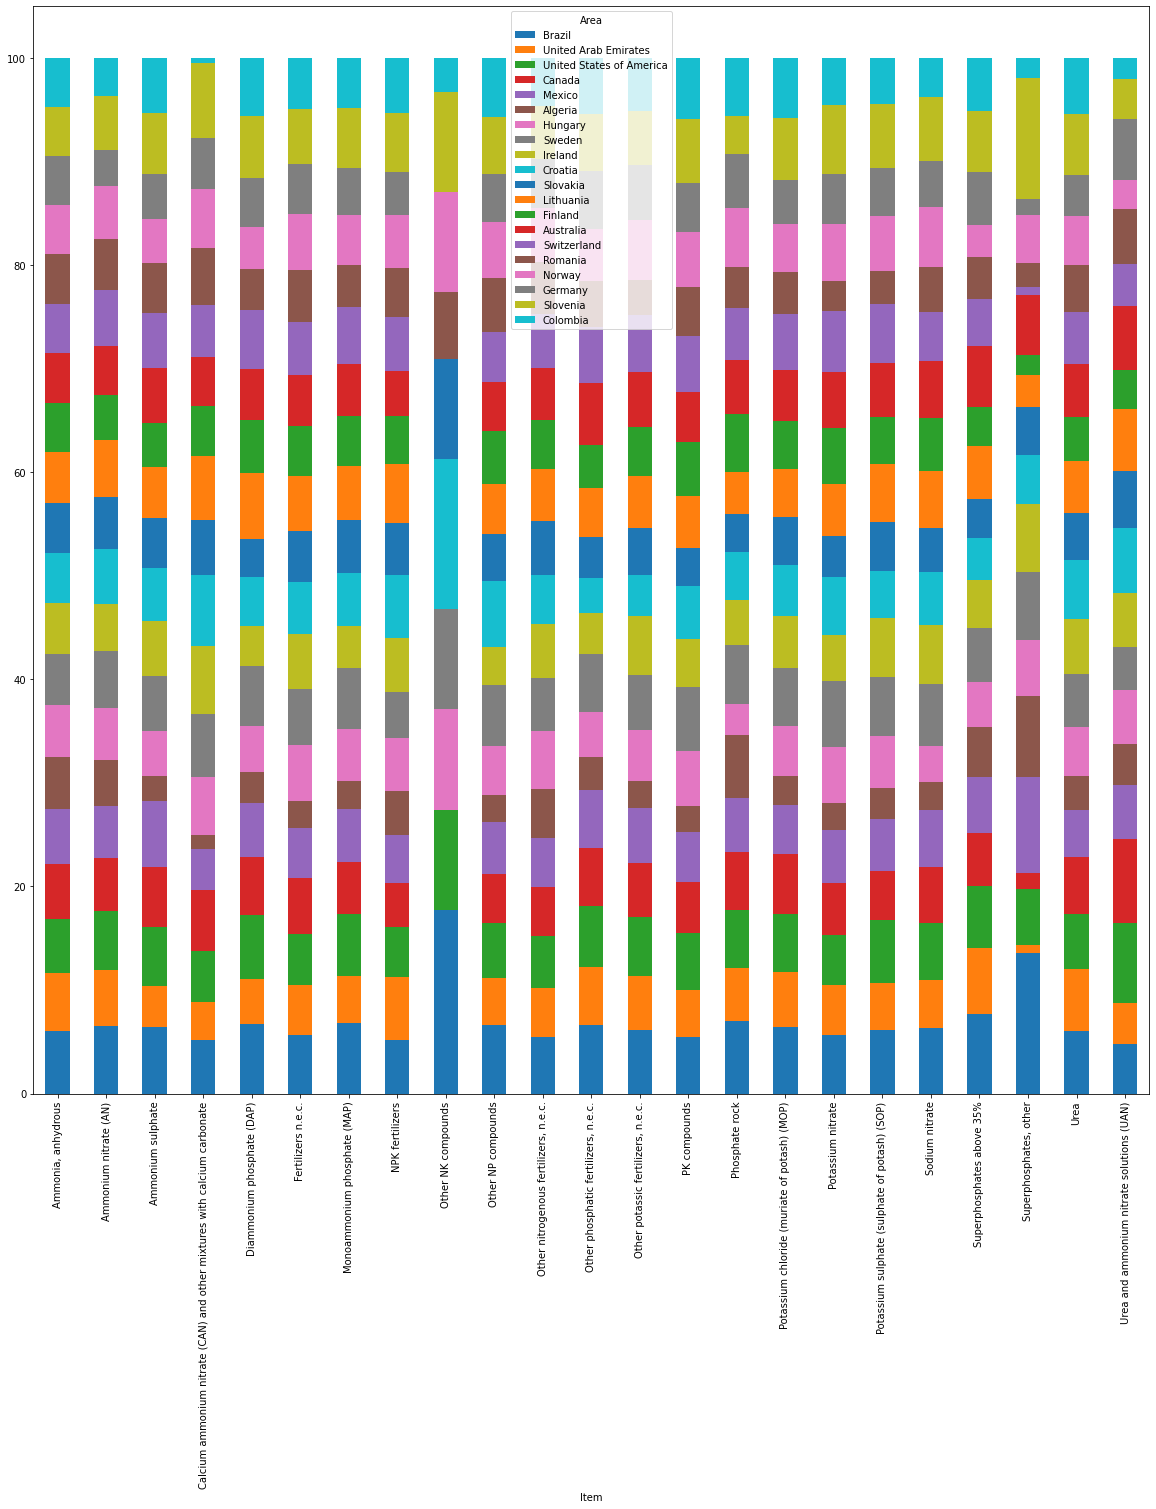

In [105]:
dfapply = dfapply.T


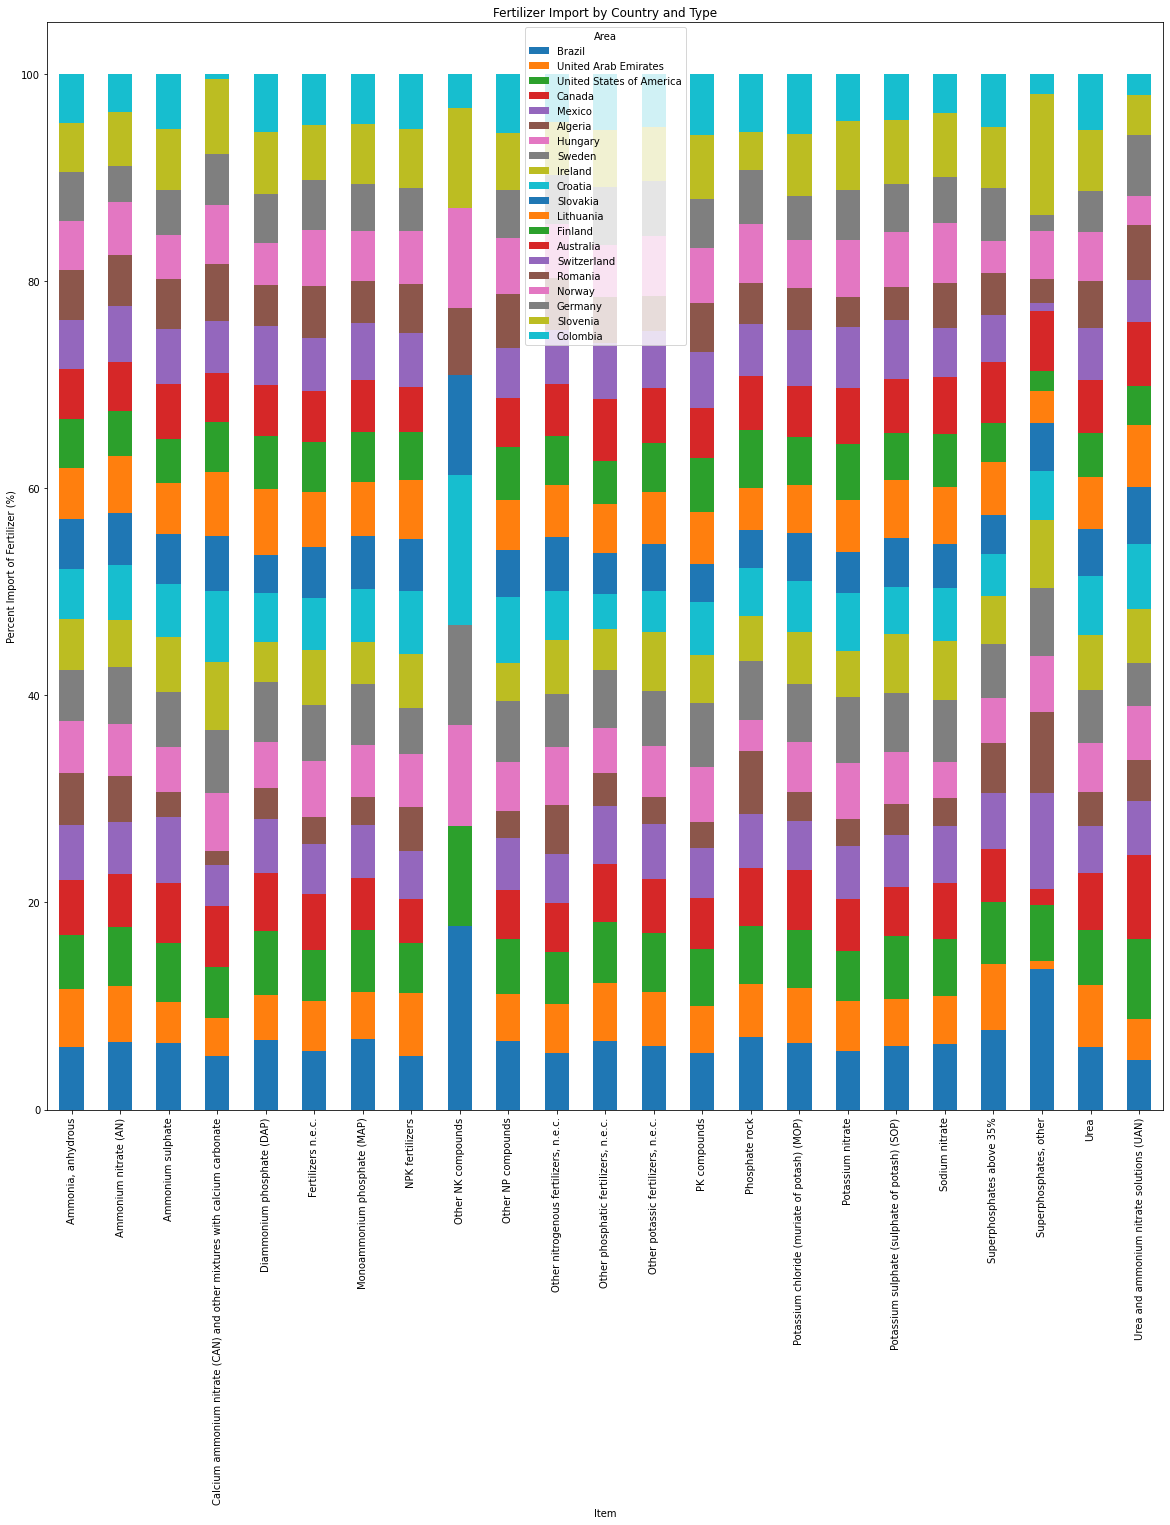

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
ax.set_ylabel('Percent Import of Fertilizer (%)')
ax.set_xlabel('Fertilizer Type')
ax.set_title('Fertilizer Import by Country and Type')
plt.legend(dfapply.columns.to_list(),loc=(1,0.5))
dfapply.plot(ax=ax,kind='bar',stacked=True)

fig.savefig('output/fertilizerbycountrybarplot.png')